## Part A.
### Explain the process of Hierarchical clustering (Agglomerative)  through an appropriate dataset (python code is optional].

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv ("Agglomerative.csv") 
df.head()

FileNotFoundError: [Errno 2] File Agglomerative.csv does not exist: 'Agglomerative.csv'

#### The make_blobs() function is used to generate blobs of points with a Gaussian distribution.

#### This is used to control how many blobs to generate and the number of samples to generate, as well as a host of other properties.

#### Also, we are taking 40 samples

In [ ]:
X1, y1 = make_blobs(n_samples=40, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)


#### The Agglomerative Clustering requires two inputs:

#### n_clusters: The number of clusters to form as well as the number of centroids to generate.
#### For the code, we kept 4 number of clusters
#### linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#### Value will be: 'complete'

In [ ]:
X1.shape

(40, 2)

In [ ]:
y1.shape

(40,)

#### Dividing the samples into 4 clusters

In [ ]:
clust = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')  #average

In [ ]:
clust.fit(X1, y1)


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[ 0.          4.96337839  9.79859109 ... 11.35224826  1.65725233
   5.66906995]
 [ 4.96337839  0.          5.3044716  ...  6.94159909  5.42765256
   0.74055856]
 [ 9.79859109  5.3044716   0.         ...  1.6391485   9.62844748
   4.90254335]
 ...
 [11.35224826  6.94159909  1.6391485  ...  0.         11.08090582
   6.53907894]
 [ 1.65725233  5.42765256  9.62844748 ... 11.08090582  0.
   6.16805016]
 [ 5.66906995  0.74055856  4.90254335 ...  6.53907894  6.16805016
   0.        ]]


#### Using the linkage class from hierarchy, pass in the parameters:

#### The distance matrix
#### 'complete' for complete linkage


In [ ]:
param = hierarchy.linkage(dist_matrix, 'complete') #average

<ipython-input-9-d2023944cba0>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  param = hierarchy.linkage(dist_matrix, 'complete') #average


###### A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

###### Next, we will save the dendrogram to a variable called dendro. In doing this, the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter:

<ipython-input-10-8da0c55b57fa>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  param = hierarchy.linkage(dist_matrix, 'complete') #average


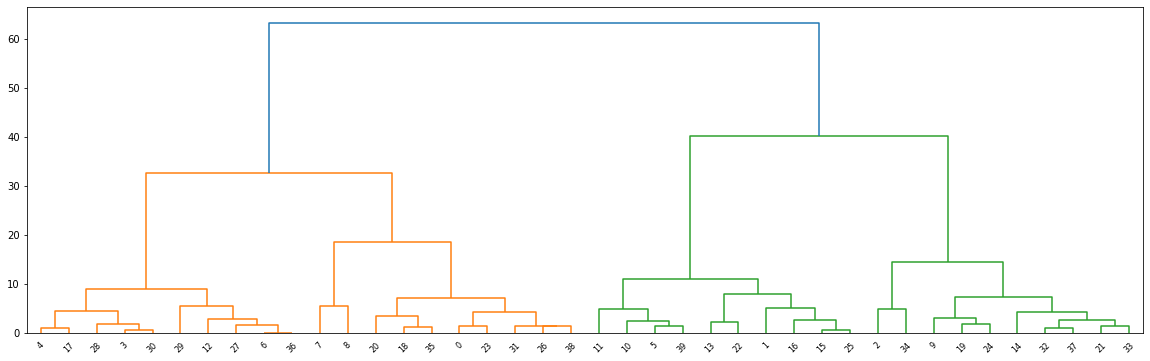

In [ ]:
param = hierarchy.linkage(dist_matrix, 'complete') #average
plt.figure(figsize=(20,6))
dendro = hierarchy.dendrogram(param)

## Part B.
### How does Heirarchical clustering solve the disadvantages of K Means?

There are many differences and benifits of hierarchical clustering over K-means clustering.

When we use K-means clustering, a single partinioning is used, wheras, hierarchical clustering can yield different partitions based on how much level of preciseion we are looking for. 

In K-means clustering we need to give the numebr of clusters. But in hierarchical clustering we need not do that. Hierarchical clustering gives us deep insight of each step of converging different clusters and create dendogram which helps you figure out which clusters combination makes sense and where tou want to stop. Basically hierarchical gives you a much bigger picture than k means.

Hierachical clustering is therefore more flexible than K-means clustering.

## Part C.
### Explain how it is beneficial for businesses.

Being flexible in nature, Hierarchical clustering can be used in cases where we do not have a preset notion about how many cluster are to be formed.

EXample Use case:
Let us consider a motorcycle manufacturing company that is going for brand extenion. The company performs market survey to understand the requirements of it customer on the basis of various specifications of the motorcycle. Now, there would be variosu segments prefereing different specifications of the motorcycle. To find out this segments hierarchical clustering can be performed.

Why hierarchical?
There would be various segments that can be formed on this basis, so to find out without knowing the number of clusters, we can use hierarchical clustering over K-means.